### Задание 5. Анализ стратегий спрэд на рынке фьючерсов

In [ ]:
## Цель задания:
### 1. Получить навык работы с биржевой иформацией на срочном рынке
### 2. Идентифицировать спрэд на рынке фьючерсов
### 3. Сравнить различные стратегии работы с ПФИ с точки зрения соотношения риск-доходность
### Данные по срочному рынку МОЕХ можно взять с сайта www.moex.com/ru/derivatives

## 1.Загрузка библиотек

In [1]:
import numpy as np
import pandas as pd

In [2]:
from __future__ import division

In [3]:
from scipy import stats

In [ ]:
import matplotlib.pyplot as plt # графическая библиотека
%matplotlib inline 

In [5]:
from datetime import datetime

## 2.Загрузка данных и их преобразование в необходимый формат

### В задании рассмотрим построение фьючерсных стратегий на примере индекса РТС 

In [6]:
path='/home/maxime/Documentos/Derivatives/LIBOR/'

### Загрузка данных по индексу РТС (рынок спот для индекса). Данные необходимы для сравнительной динамики.

In [7]:
RTSI=pd.read_csv(path+'RTSI.csv',skiprows=3,delimiter=';',usecols=[2,5],names=['Date','Close'])

In [8]:
RTSI.head()

,Date,Close
0,2019-01-24,"1188,15"
1,2019-01-23,"1186,51"
2,2019-01-22,"1169,79"
3,2019-01-21,"1171,09"
4,2019-01-18,"1176,42"


In [9]:
RTSI.dtypes

Date     object
Close    object
dtype: object

In [10]:
RTSI['Date']=RTSI['Date'].apply(lambda x:datetime.strptime(x, '%Y-%m-%d')) 
### преобразование поля даты в необходимый формат

In [11]:
RTSI['Close']=RTSI['Close'].apply(lambda x:(str(x).replace(',','.')))
RTSI['Close']=RTSI['Close'].apply(pd.to_numeric, errors='coerce')
# преобразование полей  в числовой формат

In [12]:
RTSI.head()

,Date,Close
0,2019-01-24,1188.15
1,2019-01-23,1186.51
2,2019-01-22,1169.79
3,2019-01-21,1171.09
4,2019-01-18,1176.42


### Фьючерс на индекс RTS - июнь 2019

In [13]:
RTS_06=pd.read_csv(path+'RIM9-ru.csv',delimiter=';',header=None)

In [14]:
RTS_06=pd.read_csv(path+'RIM9-ru.csv',delimiter=';',skiprows=3,usecols=[0,2,10,11,12,13],names=['Date','Sett',
 'Vol_rub','Vol_contr','Open_int_rub','Open_int_contr'])

In [15]:
RTS_06.dtypes

Date               object
Sett                int64
Vol_rub           float64
Vol_contr         float64
Open_int_rub        int64
Open_int_contr      int64
dtype: object

In [16]:
RTS_06.tail()

,Date,Sett,Vol_rub,Vol_contr,Open_int_rub,Open_int_contr
406,18.01.2019,116230,131568974.0,859.0,420071053,2728
407,21.01.2019,116190,24885398.0,161.0,445823827,2890
408,22.01.2019,115750,38372056.0,250.0,422698508,2746
409,23.01.2019,117190,41442355.0,268.0,452592214,2916
410,24.01.2019,117910,92853297.0,601.0,531332173,3426


In [17]:
RTS_06['Date']=RTS_06['Date'].apply(lambda x:datetime.strptime(x, '%d.%m.%Y')) 
### преобразование поля даты в необходимый формат

### Фьючерс на индекс RTS - март 2019

In [18]:
RTS_03=pd.read_csv(path+'RIH9-ru.csv',header=None,delimiter=';',skiprows=3,usecols=[0,2,10,11,12,13],names=['Date','Sett',
 'Vol_rub','Vol_contr','Open_int_rub','Open_int_contr'])

In [19]:
RTS_03.dtypes

Date               object
Sett                int64
Vol_rub           float64
Vol_contr         float64
Open_int_rub      float64
Open_int_contr    float64
dtype: object

In [20]:
RTS_03.tail()

,Date,Sett,Vol_rub,Vol_contr,Open_int_rub,Open_int_contr
468,18.01.2019,117550,5.622201e+10,362982.0,4.818714e+10,309420.0
469,21.01.2019,117480,3.591938e+10,229731.0,4.815167e+10,308710.0
470,22.01.2019,117010,4.790968e+10,308337.0,4.941802e+10,317580.0
471,23.01.2019,118620,5.427732e+10,347327.0,5.075775e+10,323084.0
472,24.01.2019,119040,6.505934e+10,416764.0,5.070039e+10,323810.0


In [21]:
RTS_03.dtypes

Date               object
Sett                int64
Vol_rub           float64
Vol_contr         float64
Open_int_rub      float64
Open_int_contr    float64
dtype: object

In [22]:
RTS_03['Date']=RTS_03['Date'].apply(lambda x:datetime.strptime(x, '%d.%m.%Y')) 
# преобразование поля даты в необходимый формат

## 3. Визуальный анализ динамики индекса РТС и фьючерсных контрактов

In [23]:
df_list=[RTSI[['Date','Close']],RTS_03[['Date','Sett']],RTS_06[['Date','Sett']]]
# список массивов, с данными по индексу и фьючерсным контрактам

In [24]:
RTS=reduce(lambda left,right: pd.merge(left,right,on=['Date']),df_list)
# объедиенный массив данных по индексу и фьючерсным контрактам

In [25]:
RTS.columns=['Date','RTS','RTS_03','RTS_06']

In [26]:
RTS.head()

,Date,RTS,RTS_03,RTS_06
0,2019-01-24,1188.15,119040,117910
1,2019-01-23,1186.51,118620,117190
2,2019-01-22,1169.79,117010,115750
3,2019-01-21,1171.09,117480,116190
4,2019-01-18,1176.42,117550,116230


In [27]:
RTS.sort_values(by=['Date'],axis=0,inplace=True)
# сортировка данных по дате

In [28]:
RTS.head()

,Date,RTS,RTS_03,RTS_06
99,2018-09-03,1085.19,107060,107560
98,2018-09-04,1082.21,106630,106970
97,2018-09-05,1068.88,106190,107500
96,2018-09-06,1054.36,104940,105300
95,2018-09-07,1050.51,104680,105490


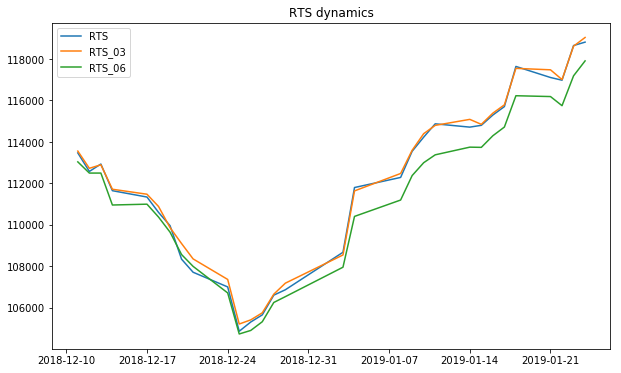

In [29]:
plt.figure(figsize=(10,6))
_=plt.plot(RTS.tail(30)['Date'],RTS.tail(30)['RTS']*100)
_=plt.plot(RTS.tail(30)['Date'],RTS.tail(30)['RTS_03'])
_=plt.plot(RTS.tail(30)['Date'],RTS.tail(30)['RTS_06'])
_=plt.legend()
_=plt.title('RTS dynamics')

### Показатель объема торгов является очень важным, с точки зрения построения стратегий на рынке фьючерсов. Ликвидность может оказаться ограничительным фактором для построения стратегий.

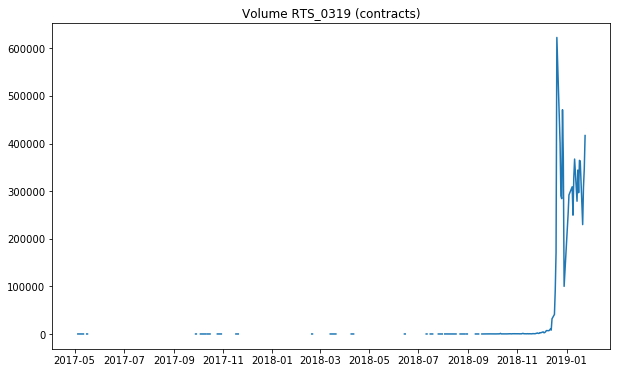

In [30]:
plt.figure(figsize=(10,6))
_=plt.plot(RTS_03['Date'],RTS_03['Vol_contr'])
_=plt.title('Volume RTS_0319 (contracts)')

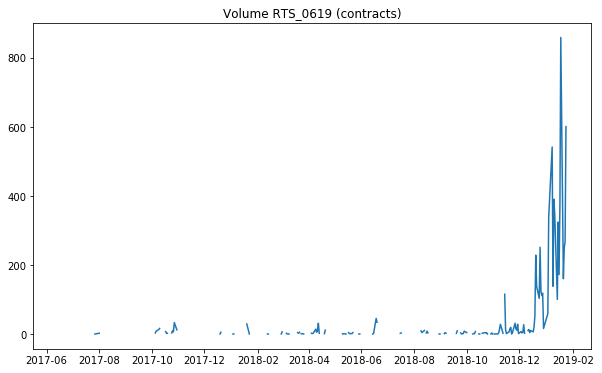

In [31]:
plt.figure(figsize=(10,6))
_=plt.plot(RTS_06['Date'],RTS_06['Vol_contr'])
_=plt.title('Volume RTS_0619 (contracts)')

### На основании графиков можно сделать следующие выводы:
### 1. Котировки индекса и фьючерсных контрактов очень тесно следуют друг за другом. Вместе с тем мы видим определенные отклонения спрэда от некоторой средней величины, что открывает возможности для формирования позиций
### 2. Основная ликвидность сосредотачивается в самом ближнем контракте
### 3. Объемы торгов начинают существенно увеличиваются примерно за 3-4 месяца до даты истечения контракта

## 4.Построение стратегии спрэд

In [32]:
days=21
# для анализа стратегий выбираем торговый месяц

In [33]:
RTS.iloc[-days,0]
# дата первого дня 

Timestamp('2018-12-24 00:00:00')

In [34]:
RTS.iloc[-1,0]
# дата последнего дня 

Timestamp('2019-01-24 00:00:00')

### Котировки RTS_06,RTS_03 день 1

In [35]:
RTS.iloc[-days,3],RTS.iloc[-days,2]

(106720, 107370)

### Начальное значение спрэда 

In [36]:
spread_start=RTS.iloc[-days,3]- RTS.iloc[-days,2]
spread_start

-650

### Котировки RTS_06,RTS_03 день 21

In [37]:
RTS.iloc[-1,3],RTS.iloc[-1,2]

(117910, 119040)

### Конечное значение спрэда 

In [38]:
spread_end=RTS.iloc[-1,3]-RTS.iloc[-1,2]
spread_end

-1130

### Изменение RTS_06

In [39]:
RTS.iloc[-1,3]-RTS.iloc[-days,3]

11190

### Изменение RTS_03

In [40]:
RTS.iloc[-1,2]-RTS.iloc[-days,2]

11670

In [41]:
spread_end-spread_start

-480

### Т.к. спрэд уменьшился, позиция соответствует bull spread, т.е. длинная позиция по ближнему контракту и короткая позиция по дальнему 

In [42]:
# определение вида спрэда
def spread_func(spread_start, spread_end):
    k_1=1
    k_2=-1
    spread='bull spread'
    if spread_end>spread_start:
        k_1=-1
        k_2=1
        spread='bear spread'
    return (k_1,k_2,spread)

In [43]:
k_1,k_2,spread=spread_func(spread_start, spread_end)
k_1,k_2,spread

(1, -1, 'bull spread')

## 5.Сравнительный анализ открытой позиции и стратегии спрэд

### Для сравнения двух вариантов работы на рынке будем использовать показатели VAR и Sharpe ratio.  Результаты приводятся к периоду, равному одному торговому месяцу. 

In [44]:
spread_df=pd.DataFrame(zip(RTS.iloc[-days:,2],RTS.iloc[-days:,3],
RTS.iloc[-days:,3]-RTS.iloc[-days:,2]),columns=['RTS_03','RTS_06','Spread'])
# вспомогательный массив для расчета показателей риска и доходности

In [45]:
spread_df.head()

,RTS_03,RTS_06,Spread
0,107370,106720,-650
1,105220,104740,-480
2,105420,104910,-510
3,105760,105330,-430
4,106660,106260,-400


In [46]:
# расчет логарифмической доходности по котировкам фьючерсных контрактов
spread_df[['ln_ret_RTS_03','ln_ret_RTS_06']]=spread_df[['RTS_03','RTS_06']].apply(lambda x:np.log(x)-np.log(x).shift(1))

In [47]:
spread_df=spread_df.iloc[1:,:]

### Доходность стратегии спрэд соответствует доходности условного портфеля, состоящего из двух активов, один из которых находится в коротокой позиции, а другой в длинной

In [48]:
spread_df['ln_spread']=spread_df['ln_ret_RTS_03']*k_1+spread_df['ln_ret_RTS_06']*k_2

In [49]:
spread_df.head()

,RTS_03,RTS_06,Spread,ln_ret_RTS_03,ln_ret_RTS_06,ln_spread
1,105220,104740,-480,-0.020227,-0.018727,-0.001500
2,105420,104910,-510,0.001899,0.001622,0.000277
3,105760,105330,-430,0.003220,0.003995,-0.000775
4,106660,106260,-400,0.008474,0.008791,-0.000317
5,107190,106540,-650,0.004957,0.002632,0.002325


In [50]:
vector_means=spread_df[['ln_ret_RTS_03','ln_ret_RTS_06','ln_spread']].sum(axis=0)
# вектор средних

In [51]:
vector_means

ln_ret_RTS_03    0.103179
ln_ret_RTS_06    0.099713
ln_spread        0.003466
dtype: float64

In [52]:
vector_std=np.std(spread_df[['ln_ret_RTS_03','ln_ret_RTS_06','ln_spread']])
# вектор стандартных отклонений

In [53]:
vector_std

ln_ret_RTS_03    0.009049
ln_ret_RTS_06    0.007947
ln_spread        0.001732
dtype: float64

### Расчет вариации "портфеля" (спрэд)

In [54]:
weights=np.array([k_1,k_2])

In [55]:
Sigma_port=np.sqrt(np.dot(np.dot(weights.T,np.cov(spread_df[['ln_ret_RTS_03','ln_ret_RTS_06']],rowvar=False)),
                          weights.T))

In [56]:
Sigma_port

0.0017765348201470329

### VAR

In [57]:
alpha=0.05

In [58]:
vector_means-stats.norm.ppf(alpha)*vector_std*np.sqrt(days)

ln_ret_RTS_03    0.171388
ln_ret_RTS_06    0.159615
ln_spread        0.016518
dtype: float64

### Sharpe ratio 

### Использование Sharpe ratio для оценки фьючерсных позиций (и вообще позиций с плечом) не так очевидно, как в случае с обычными активами. По этой причине возьмем данный показатель только в качестве некоторого индикатива. Т.к мы рассматриваем короткий период времени, пренебрежем безрисковой ставкой 

In [59]:
vector_means/(vector_std*np.sqrt(days))

ln_ret_RTS_03    2.488130
ln_ret_RTS_06    2.738012
ln_spread        0.436765
dtype: float64

### Выводы:
### 1. С точки зрения соотношения риска и доходности, открытая позияция выглядит более привлекательной
### 2. Если принимать во внимание только риск, стратегия спрэда существенно менее рискованная
### 3. Стратегия спрэда больше подходит для рынка с боковым трендом (отсутствие ярко выраженной динамики)

In [ ]:
## Задание

In [ ]:
### 1. Выбрать фьючерс и загрузить котировки  контрактов с двум соседними датам исполнения, также загрузить информацию по базовому активу
### 2. Провести визуальный анализ динамики движения контрактов и базового актива (период 3 месяца)
### 3. Для периода в один торговый месяц определить направление спрэда
### 4. Провести сравнительный анализ открытой позиции и стратегии спрэда
### 5. Сделать выводы